<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>February 20, 2018: collecting from dedicated nbs
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions: <i>Jordan normal forms</i>.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, t

init_printing()

In [2]:
%run ../../src/matrix_functions.py

In [3]:
alpha, beta = IndexedBase(r'\alpha'), IndexedBase(r'\beta')
m=8
Iexp = Matrix(m, m, lambda n, k: factorial(n) if n==k else 0)

---

# Fibonacci generation matrix

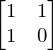

In [4]:
F = Matrix([
        [1, 1],
        [1, 0],
    ])
F

In [5]:
m=2
data, eigenvals, multiplicities = eigendata = eigen_data(F)
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_polynomials = component_polynomials(Phi_poly, eigendata)
cmatrices = component_matrices(F, Phi_polynomials)
M_space_ctor = M_space(cmatrices)
v_vector = Matrix(m, 1, lambda i, _: alpha[i])
M_space_v = M_space_ctor(v_vector)

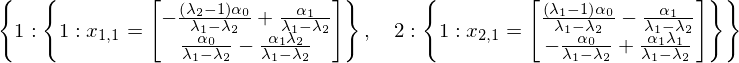

In [6]:
M_space_v

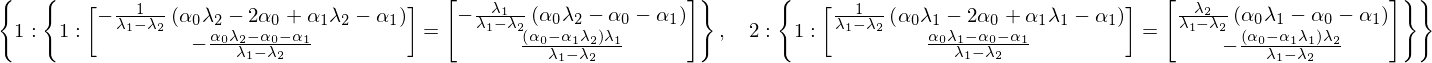

In [7]:
relations = generalized_eigenvectors_relations(eigendata)
eqs = relations(F, M_space_v,post=lambda i: i.radsimp().factor())
eqs

In [8]:
miniblocks = Jordan_blocks(eigendata)
X, J = Jordan_normalform(eigendata, matrices=(F, M_space_v, miniblocks))

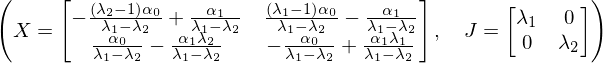

In [9]:
X, J

In [10]:
# FX=XJ
assert ((F*X.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand())==
        (X.rhs*J.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand()))

# $\mathcal{P}$

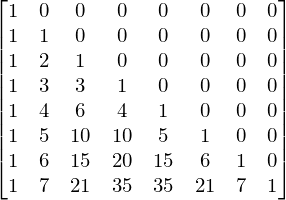

In [11]:
m=8
P = Matrix(m,m,binomial)
P

In [12]:
data, eigenvals, multiplicities = eigendata = eigen_data(P)
Phi_poly = Phi_poly_ctor(deg=m-1)
#Phi_polynomials = component_polynomials(Phi_poly, eigendata)
Phi_polynomials = component_polynomials_riordan(m)
cmatrices = component_matrices(P, Phi_polynomials)

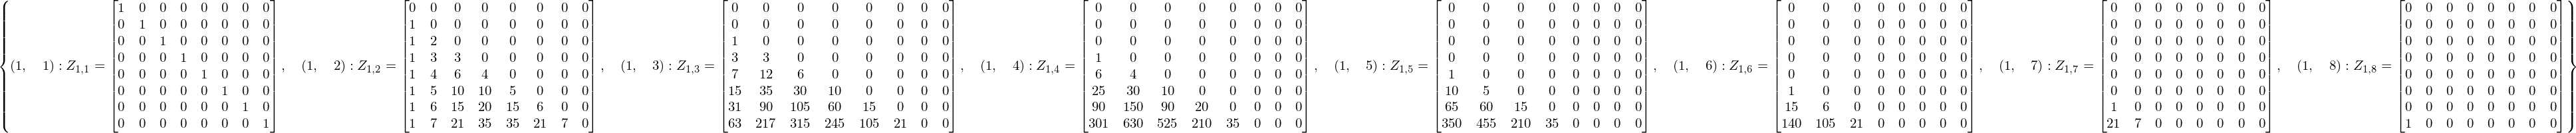

In [13]:
cmatrices

In [14]:
alpha_vector = Matrix(m, 1, lambda i, _: alpha[i])
M_space_ctor = M_space(cmatrices)
M_space_v = M_space_ctor(alpha_vector)

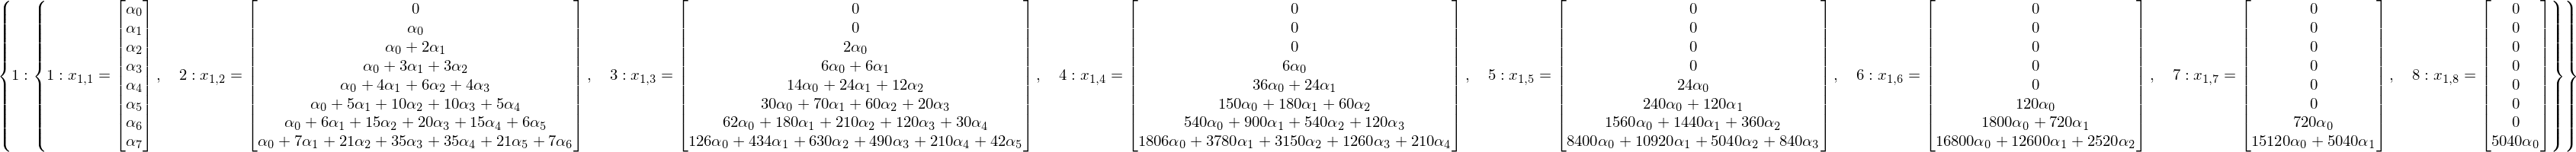

In [15]:
M_space_v

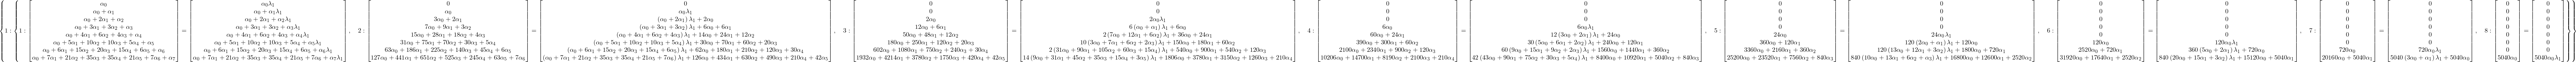

In [16]:
relations = generalized_eigenvectors_relations(eigendata)
eqs = relations(P, M_space_v)
eqs

In [17]:
miniblocks = Jordan_blocks(eigendata)
X_P, J_P = Jordan_normalform(eigendata, matrices=(P, M_space_v, miniblocks))
X_P_lambda = Lambda(alpha_vector, X_P.rhs)

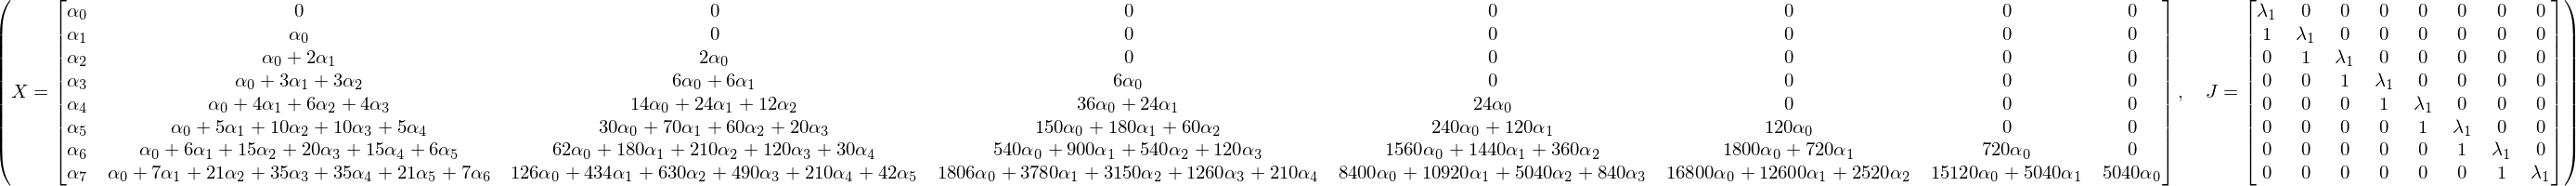

In [18]:
X_P, J_P

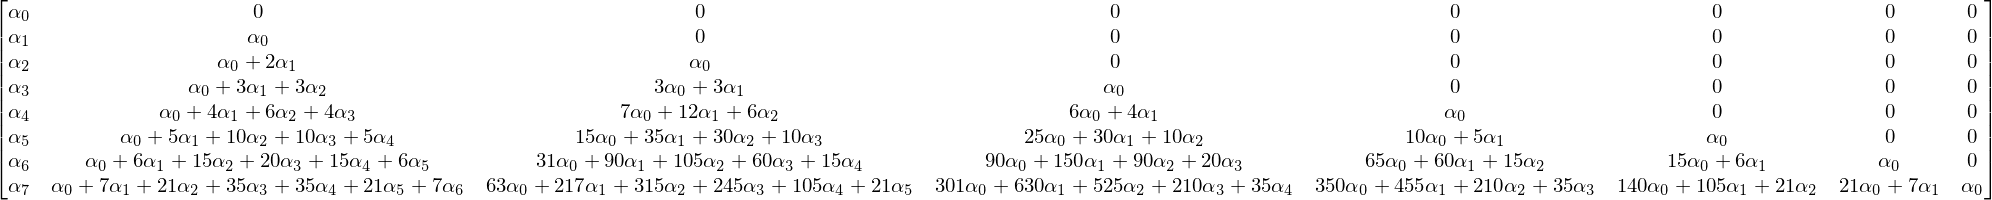

In [19]:
X_P.rhs * Iexp**(-1)

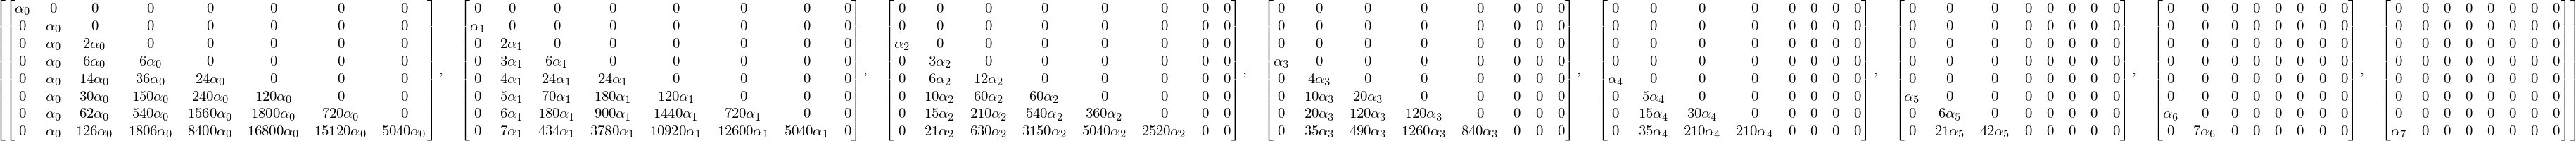

In [21]:
X_P_split = split_X_matrix(X_P.rhs, alpha_vector, factor=False)
X_P_split

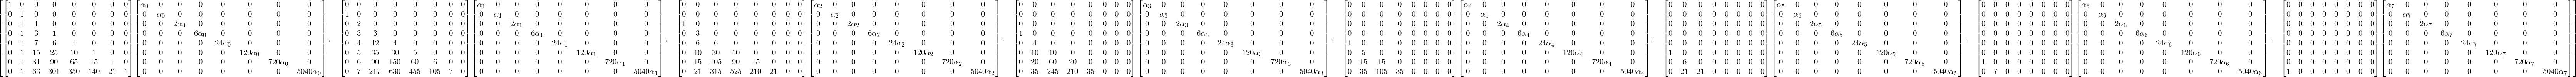

In [22]:
X_P_split = split_X_matrix(X_P.rhs, alpha_vector, factor=True)
X_P_split

In [159]:
inspect(X_split[1].args[1][1:,:-1]*((Iexp**(-1))[1:,1:]))

NameError: name 'M' is not defined

In [23]:
inspect(X_P.rhs)

nature(is_ordinary=False, is_exponential=False)

In [45]:
inspect((X_P.rhs * Iexp**(-1))[:5, :5])

nature(is_ordinary=False, is_exponential=True)

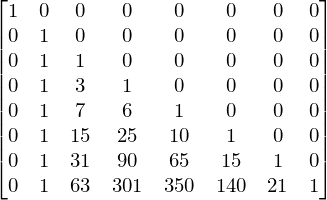

In [95]:
selection = [1] + ([0]*(m-1))
X_P_lambda(*selection) * Iexp**(-1)

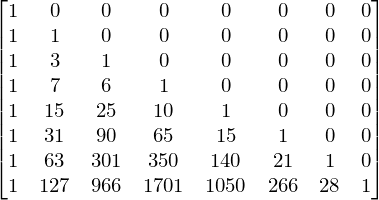

In [96]:
selection = [1] * m
X_P_lambda(*selection) * Iexp**(-1)

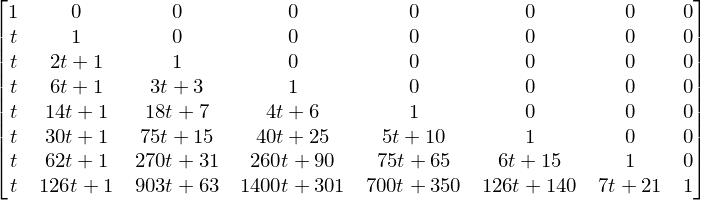

In [66]:
selection = [1] + ([t]*(m-1))
X_P_lambda(*selection) * Iexp**(-1)

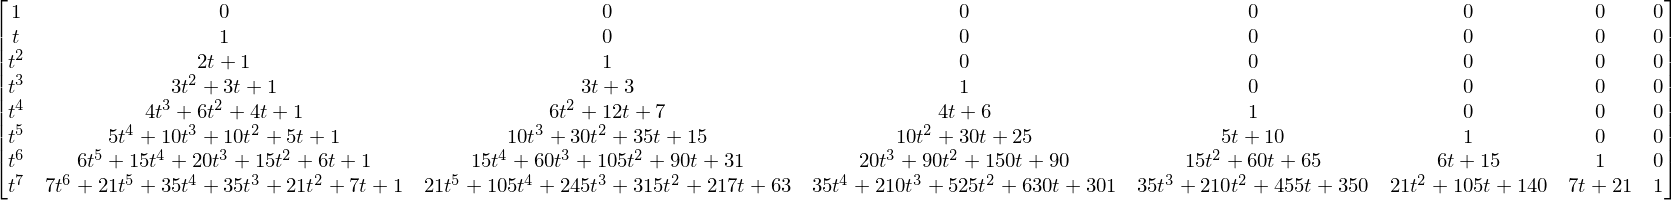

In [84]:
selection = [t**i for i in range(m)]
X_P_lambda(*selection) * Iexp**(-1)

In [51]:
# FX=XJ
assert ((P*X_P.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand())==
        (X_P.rhs*J_P.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand()))

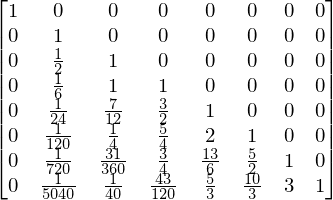

In [114]:
Matrix(m, m, riordan_matrix_by_convolution(Eq(Function('d')(t), 1), 
                                           Eq(Function('h')(t), (exp(t)-1).series(t, n=m).removeO())))

# $\mathcal{C}$

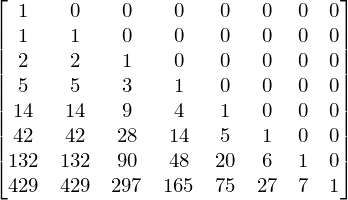

In [97]:
m = 8
A = Eq(Function('A')(t), 1/(1-t))
C = Matrix(m, m, riordan_matrix_by_AZ_sequences(m, (A, A)))
C

In [106]:
data, eigenvals, multiplicities = eigendata = eigen_data(C)
Phi_poly = Phi_poly_ctor(deg=m-1)
#Phi_polynomials = component_polynomials(Phi_poly, eigendata)
Phi_polynomials = component_polynomials_riordan(m)
cmatrices = component_matrices(C, Phi_polynomials)

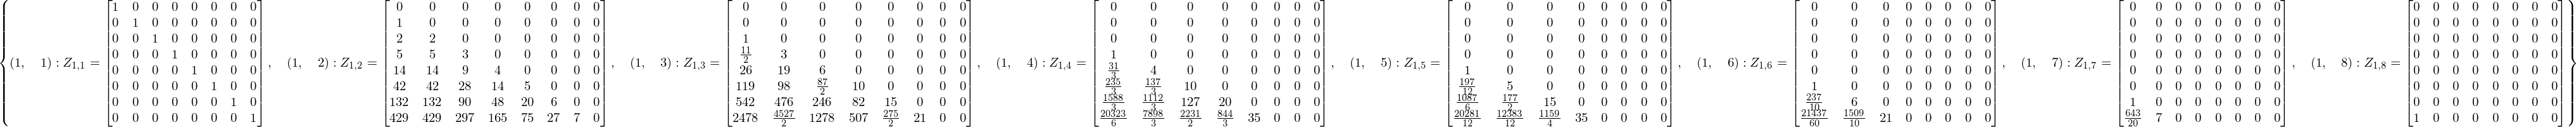

In [107]:
cmatrices

In [110]:
beta_vector = Matrix(m, 1, lambda i, _: beta[i])
M_space_ctor = M_space(cmatrices)
M_space_v = M_space_ctor(beta_vector)

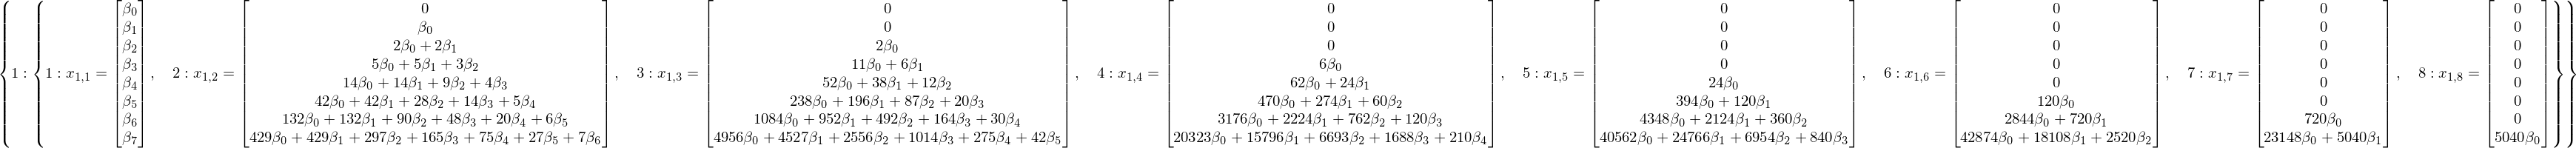

In [111]:
M_space_v

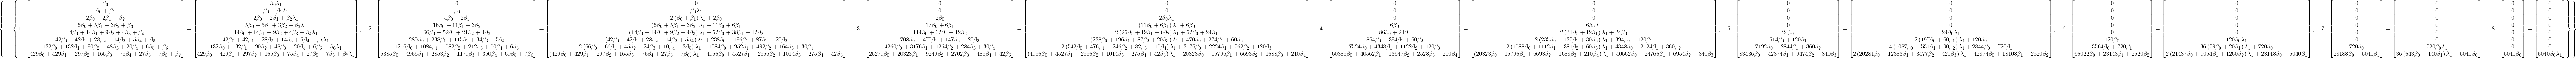

In [112]:
relations = generalized_eigenvectors_relations(eigendata)
eqs = relations(C, M_space_v)
eqs

In [122]:
miniblocks = Jordan_blocks(eigendata)
X_C, J_C = Jordan_normalform(eigendata, matrices=(C, M_space_v, miniblocks))
X_C_lambda = Lambda(beta_vector, X_C.rhs)

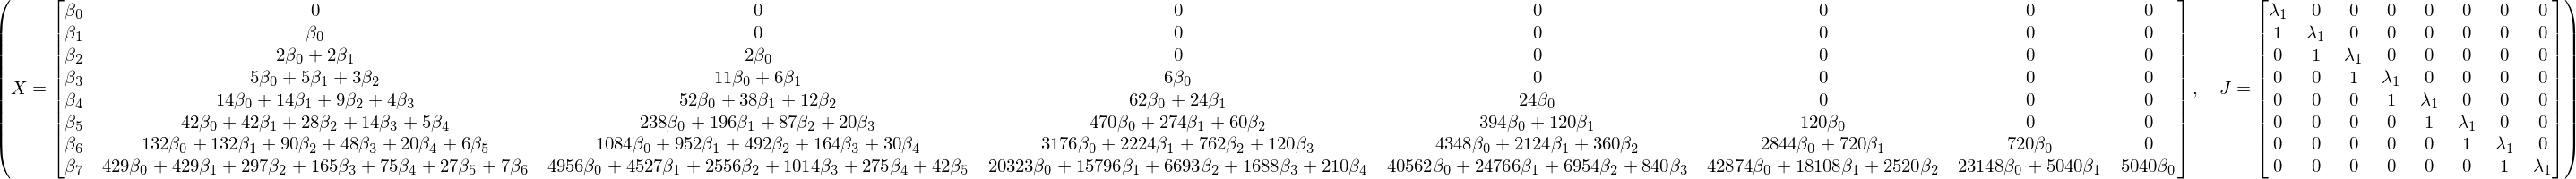

In [114]:
X_C, J_C

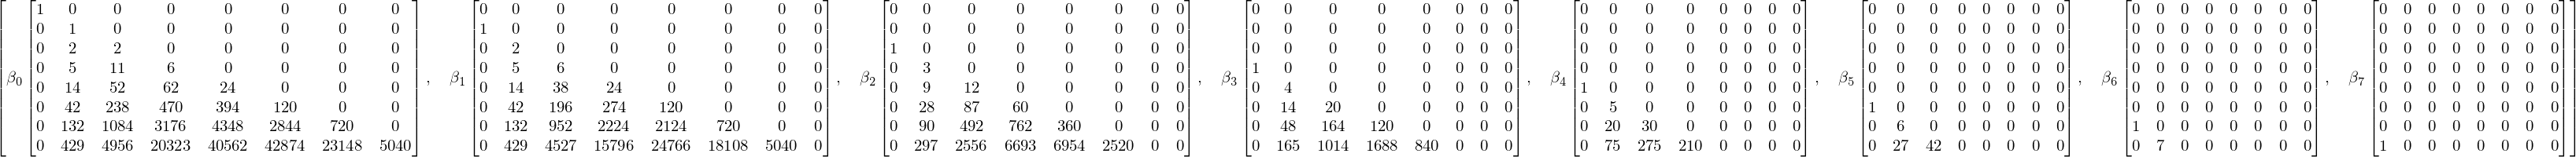

In [115]:
X_C_split = split_X_matrix(X_C.rhs, beta_vector, factor=True)
X_C_split

In [119]:
inspect(X_C_split[1].args[1][1:,:-1]*((Iexp**(-1))[1:,1:]))

nature(is_ordinary=False, is_exponential=False)

In [46]:
inspect(X_C.rhs)

TypeError: can't convert symbols to int

In [120]:
inspect((X_C.rhs * Iexp**(-1))[:5, :5])

nature(is_ordinary=False, is_exponential=False)

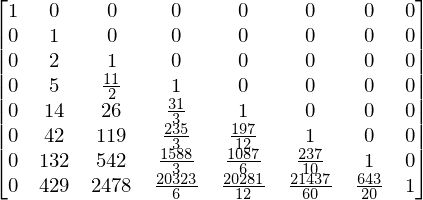

In [123]:
selection = [1] + ([0]*(m-1))
X_C_lambda(*selection) * Iexp**(-1)

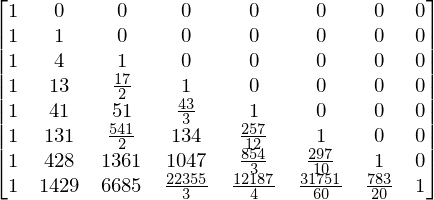

In [125]:
selection = [1] * m
X_C_lambda(*selection) * Iexp**(-1)

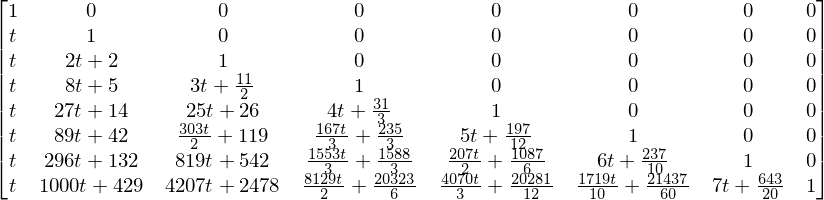

In [126]:
selection = [1] + ([t]*(m-1))
X_C_lambda(*selection) * Iexp**(-1)

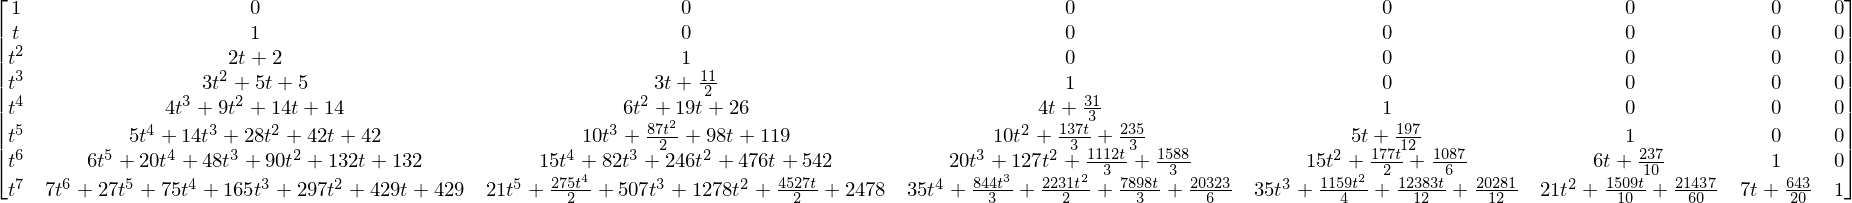

In [127]:
selection = [t**i for i in range(m)]
X_C_lambda(*selection) * Iexp**(-1)

In [65]:
# FX=XJ
assert ((C*X_C.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand())==
        (X_C.rhs*J_C.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand()))

# $\mathcal{S}$

In [24]:
from sympy.functions.combinatorial.numbers import stirling

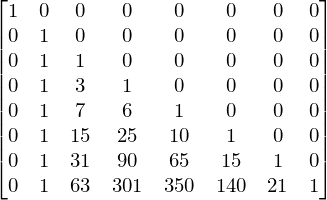

In [47]:
m=8
S2 = Matrix(m, m, lambda n,k: stirling(n,k, kind=2))
S2

In [48]:
data, eigenvals, multiplicities = eigendata = eigen_data(S2)
Phi_poly = Phi_poly_ctor(deg=m-1)
#Phi_polynomials = component_polynomials(Phi_poly, eigendata)
Phi_polynomials = component_polynomials_riordan(m)
cmatrices = component_matrices(S2, Phi_polynomials)

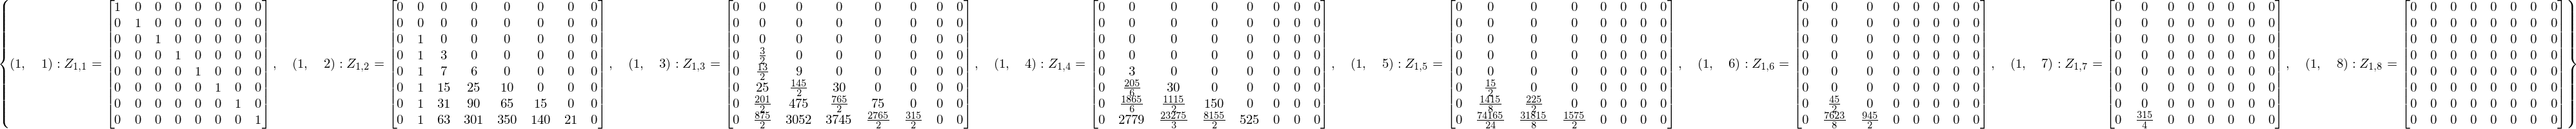

In [49]:
cmatrices

In [50]:
gamma = IndexedBase(r'\gamma')
gamma_vector = Matrix(m, 1, lambda i, _: gamma[i])
M_space_ctor = M_space(cmatrices)
M_space_v = M_space_ctor(gamma_vector)

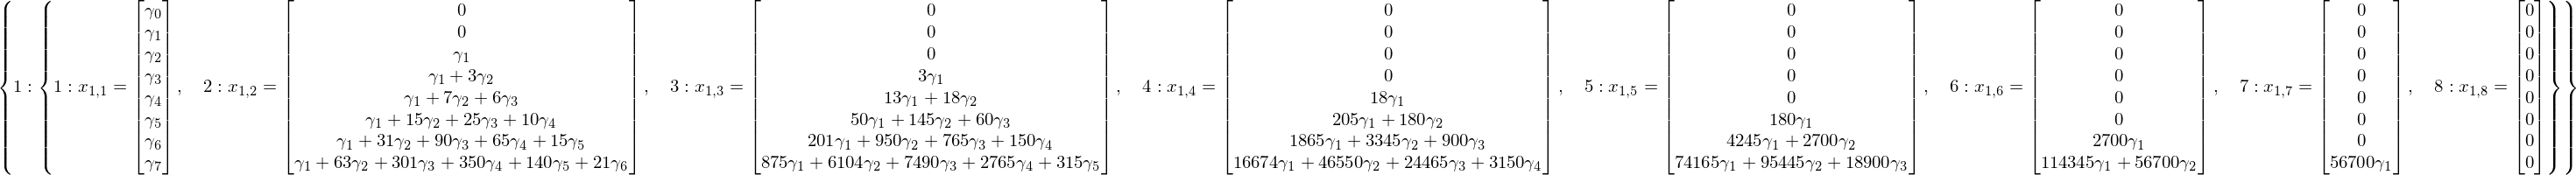

In [51]:
M_space_v

In [33]:
%run ../../src/matrix_functions.py

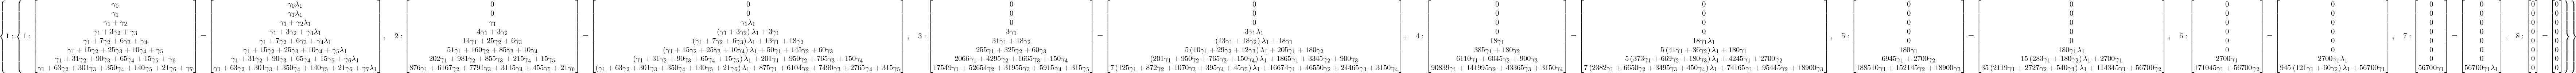

In [52]:
relations = generalized_eigenvectors_relations(eigendata)
eqs = relations(S2, M_space_v, check=True)
eqs

In [53]:
miniblocks = Jordan_blocks(eigendata)
X_S2, J_S2 = Jordan_normalform(eigendata, matrices=(S2, M_space_v, miniblocks))
X_S2_lambda = Lambda(gamma_vector, X_S2.rhs)

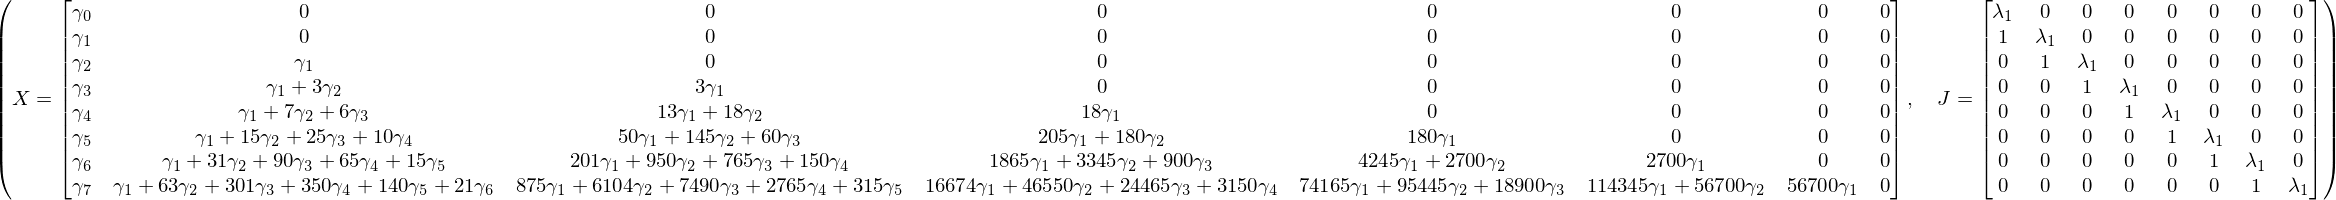

In [54]:
X_S2, J_S2

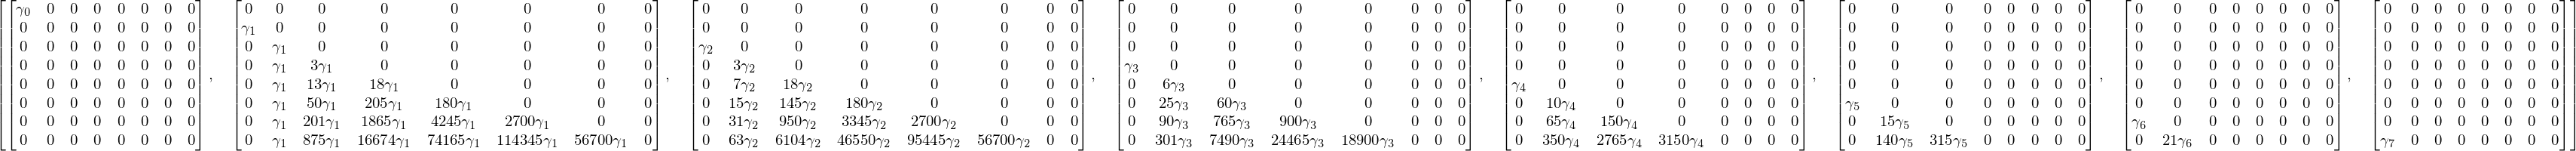

In [55]:
X_S2_split = split_X_matrix(X_S2.rhs, gamma_vector, factor=False)
X_S2_split

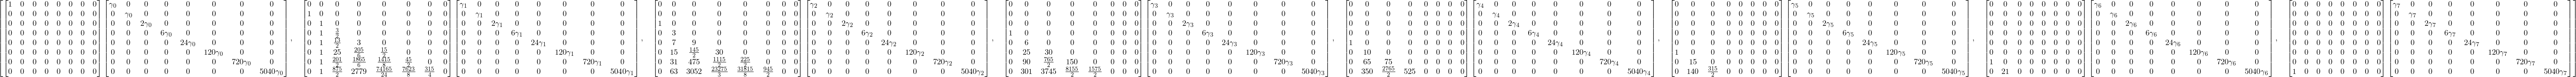

In [56]:
X_S2_split = split_X_matrix(X_S2.rhs, gamma_vector, factor=True)
X_S2_split

In [23]:
inspect(X_P.rhs)

nature(is_ordinary=False, is_exponential=False)

In [45]:
inspect((X_P.rhs * Iexp**(-1))[:5, :5])

nature(is_ordinary=False, is_exponential=True)

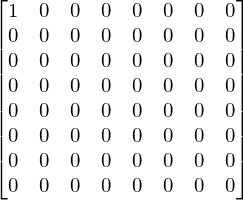

In [60]:
selection = [1] + ([0]*(m-1))
X_S2_lambda(*selection) * Iexp**(-1)

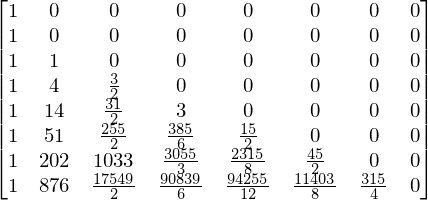

In [61]:
selection = [1] * m
X_S2_lambda(*selection) * Iexp**(-1)

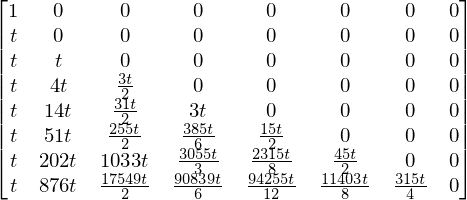

In [62]:
selection = [1] + ([t]*(m-1))
X_S2_lambda(*selection) * Iexp**(-1)

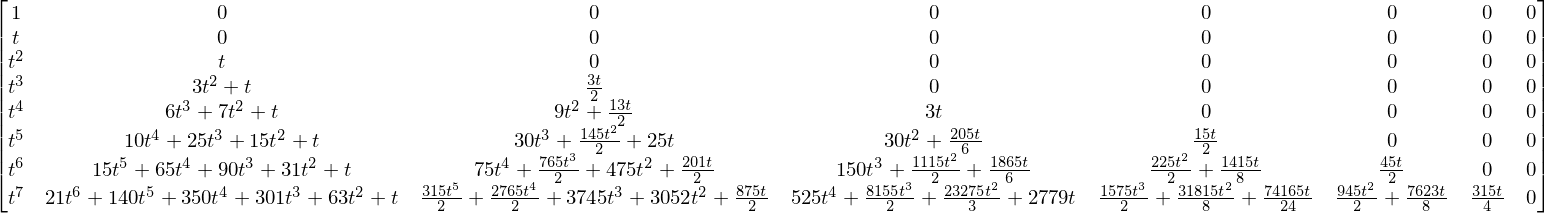

In [63]:
selection = [t**i for i in range(m)]
X_S2_lambda(*selection) * Iexp**(-1)

In [51]:
# FX=XJ
assert ((P*X_P.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand())==
        (X_P.rhs*J_P.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand()))

---

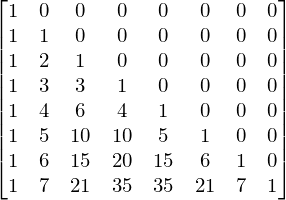

In [128]:
(X_P.rhs*X_C.rhs**(-1)*C*X_C.rhs*X_P.rhs**(-1)).applyfunc(simplify)

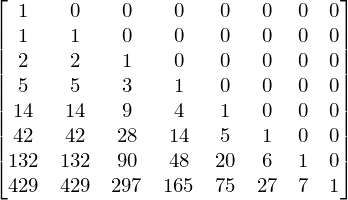

In [72]:
(X_C.rhs*X_P.rhs**(-1)*P*X_P.rhs*X_C.rhs**(-1)).applyfunc(simplify)

In [64]:
(X_S2.rhs*X_P.rhs**(-1)*P*X_P.rhs*X_S2.rhs**(-1)).applyfunc(simplify)

ValueError: Matrix det == 0; not invertible.

In [57]:
X_CP = (X_C.rhs*X_P.rhs**(-1)).applyfunc(simplify)

In [ ]:
is_ordinary_RA(X_CP), is_exponential_RA(X_CP)

In [66]:
L = Lambda(list(alpha_vector)+list(beta_vector), X_CP)

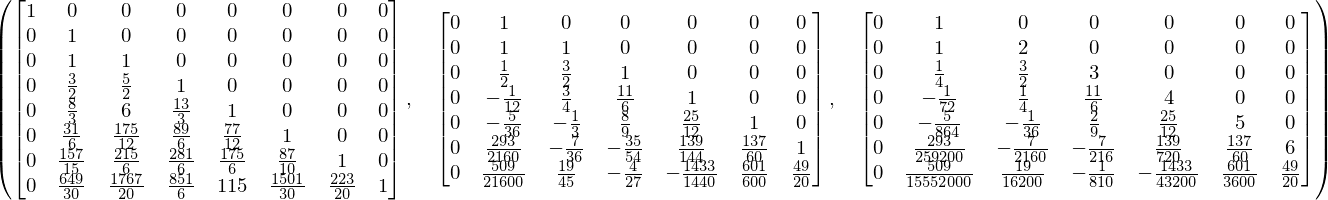

In [71]:
X_CP_v = L(*([1]+[0]*(m-1)+[1]+[0]*(m-1)))
X_CP_v, production_matrix(X_CP_v), production_matrix(X_CP_v, exp=True)

In [72]:
is_ordinary_RA(X_CP_v), is_exponential_RA(X_CP_v)

(False, False)

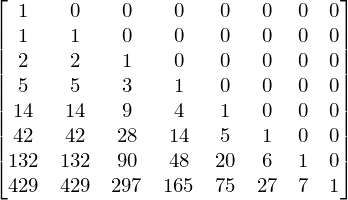

In [70]:
X_CP_v * P * X_CP_v**(-1)

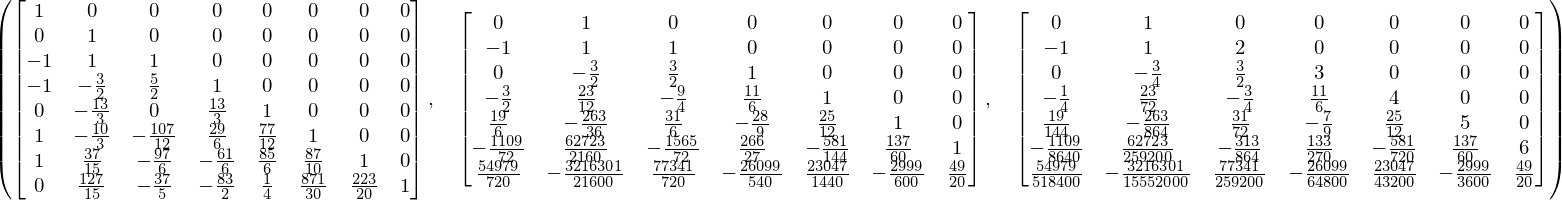

In [75]:
X_CP_v = L(*([x]*(2*m)))
X_CP_v, production_matrix(X_CP_v), production_matrix(X_CP_v, exp=True)

In [77]:
is_ordinary_RA(X_CP_v), is_exponential_RA(X_CP_v)

(False, False)

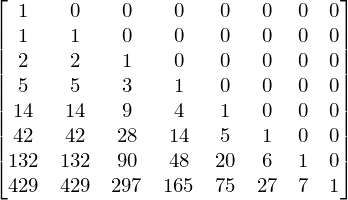

In [78]:
X_CP_v * P * X_CP_v**(-1)

In [ ]:
((X_P.rhs*X_C.rhs**(-1))**(-1)).applyfunc(simplify)

In [ ]:
((X_C.rhs*X_P.rhs**(-1))**(-1)).applyfunc(simplify)